**IMPORTANDO BIBLIOTECAS**

In [1]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

**ANÁLISE DO CONJUNTO DE DADOS**

In [2]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1//main/Iris.csv')

In [3]:
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset["Species"].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(len(dataset)))
print("\nQuantas features existem no dataset?\n%d" %(dataset.shape[1]))
print("\nQue features são essas?\n%s" %(str([k for k in dataset.keys()])))
print("\nQual o numero de instâncias por classe?")
print(dataset["Species"].value_counts())

Quantas classes existem nesse dataset?
3

Quantas instâncias existem no dataset?
150

Quantas features existem no dataset?
5

Que features são essas?
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Qual o numero de instâncias por classe?
setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


In [4]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


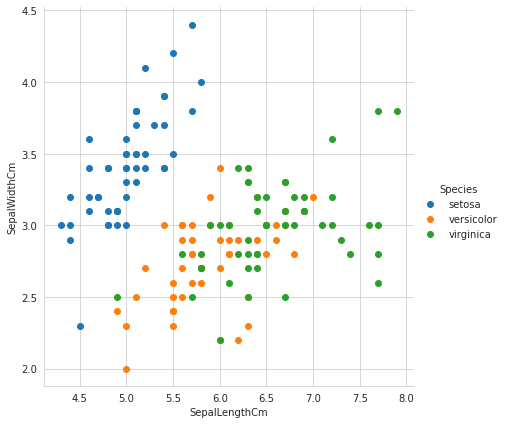

In [5]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'SepalWidthCm').add_legend()

In [6]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**SEPARANDO O CONJUNTO DE DADOS**

In [7]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[0,1]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

**TREINAMENTO DO MODELO**

In [8]:
model = KNeighborsClassifier()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      0.67      0.67        12
           2       0.71      0.71      0.71        14

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.79      0.79      0.79        38



**REGIÃO DE DECISÃO**

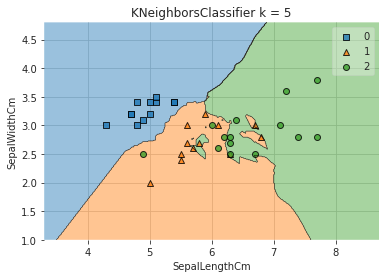

In [9]:
plot_decision_regions(np.array([X_test["SepalLengthCm"].values, X_test["SepalWidthCm"].values]).T, y_test.values.reshape(-1,1).T[0], model)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
plt.show()

**VARIANDO O TAMANHO DA VIZINHANÇA**

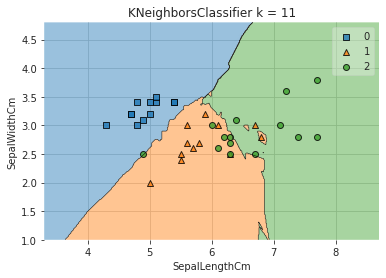

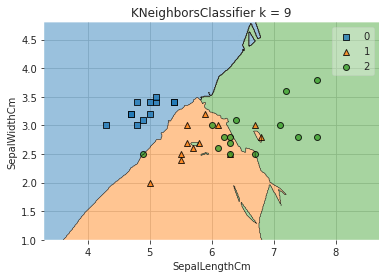

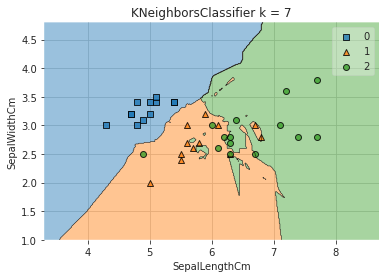

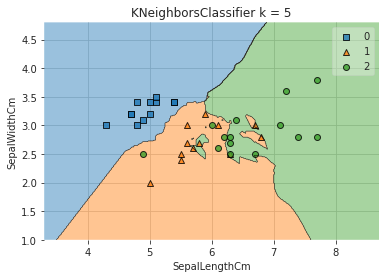

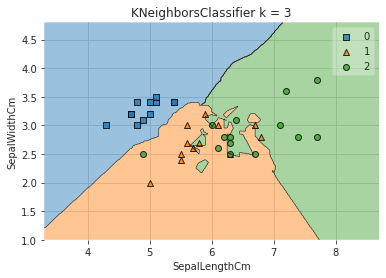

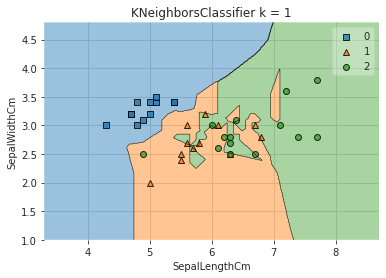

In [10]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    plot_decision_regions(np.array([X_test["SepalLengthCm"].values, X_test["SepalWidthCm"].values]).T, y_test.values.reshape(-1,1).T[0], model)
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

**MEDIDA DE DISTÂNCIA**

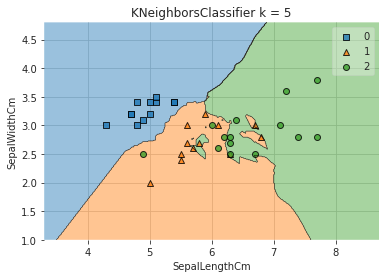

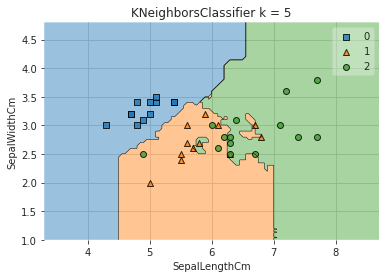

In [11]:
for m in ["euclidean", "manhattan"]:
    model = KNeighborsClassifier(metric=m)
    model.fit(X_train, y_train)

    plot_decision_regions(np.array([X_test["SepalLengthCm"].values, X_test["SepalWidthCm"].values]).T, y_test.values.reshape(-1,1).T[0], model)
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()